In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,adjusted_rand_score

In [3]:
df = pd.read_csv("Automobile price data _Raw_.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df = df.replace('?',np.nan)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df = df.replace('?',np.nan)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
for col in missing_data.columns:
    print(col)
    print(missing_data[col].value_counts())
    print(" ")

symboling
symboling
False    205
Name: count, dtype: int64
 
normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64
 
make
make
False    205
Name: count, dtype: int64
 
fuel-type
fuel-type
False    205
Name: count, dtype: int64
 
aspiration
aspiration
False    205
Name: count, dtype: int64
 
num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64
 
body-style
body-style
False    205
Name: count, dtype: int64
 
drive-wheels
drive-wheels
False    205
Name: count, dtype: int64
 
engine-location
engine-location
False    205
Name: count, dtype: int64
 
wheel-base
wheel-base
False    205
Name: count, dtype: int64
 
length
length
False    205
Name: count, dtype: int64
 
width
width
False    205
Name: count, dtype: int64
 
height
height
False    205
Name: count, dtype: int64
 
curb-weight
curb-weight
False    205
Name: count, dtype: int64
 
engine-type
engine-type
False    205
Name: count, dtype: int64
 
num-of-cylinders
num-of-cylinders
F

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
#calculating avg to handle missing values
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print(avg_norm_loss)

122.0


In [13]:
df['normalized-losses'].replace(np.nan,avg_norm_loss,inplace=True)
df.head()

C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\3772599132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan,avg_norm_loss,inplace=True)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan,avg_bore,inplace=True)
print(avg_bore)

3.3297512437810943


C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\1955772377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bore'].replace(np.nan,avg_bore,inplace=True)


In [15]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan,avg_stroke,inplace=True)
print(avg_stroke)

3.255422885572139


C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\976773759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stroke'].replace(np.nan,avg_stroke,inplace=True)


In [16]:
avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan,avg_peak_rpm,inplace=True)
print(avg_peak_rpm)

5125.369458128079


C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\3213049279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm'].replace(np.nan,avg_peak_rpm,inplace=True)


In [17]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)
print(avg_horsepower)

104.25615763546799


C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\3223833819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)


In [18]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [19]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\1957564764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.nan,'four',inplace=True)


In [20]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [21]:
df.reset_index(drop=True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [22]:
df[["bore","stroke","horsepower","price","peak-rpm"]] = df[["bore","stroke","horsepower","price","peak-rpm"]].astype('float')

In [23]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [24]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [25]:
#data standardization
#convert mpg to L/100km
df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


In [26]:
#data normalization
df[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [27]:
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()
df['height']=df['height']/df['height'].max()
df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


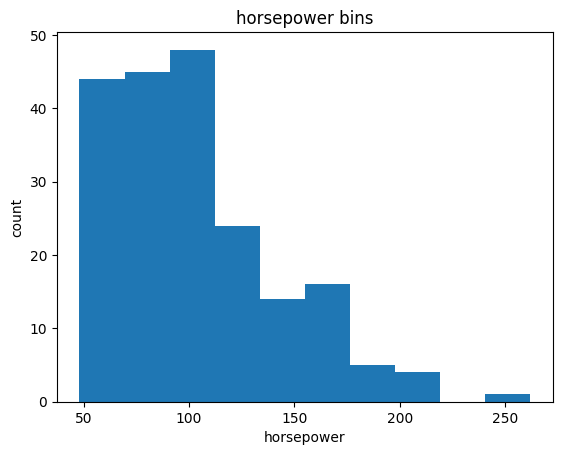

In [28]:
df['horsepower'] = df['horsepower'].astype(int,copy=True)
plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')
plt.show()

In [29]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [30]:
group_name = ['low','medium','high']

In [31]:
df['horsepower-binned'] = pd.cut(df['horsepower'],bins,labels=group_name,include_lowest=True)

In [32]:
df['horsepower-binned'].value_counts()

horsepower-binned
low       153
medium     43
high        5
Name: count, dtype: int64

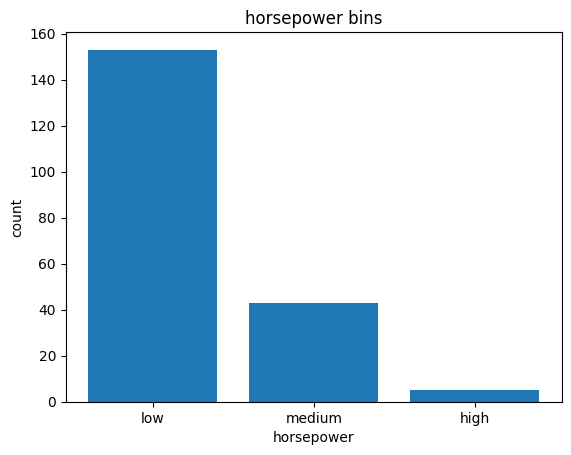

In [33]:
plt.bar(group_name,df['horsepower-binned'].value_counts())
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')
plt.show()

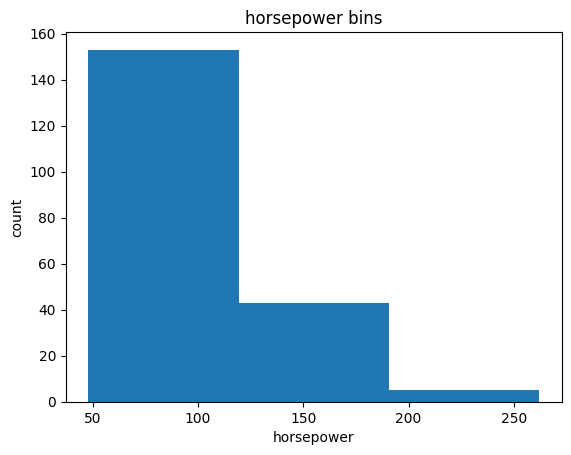

In [34]:
plt.hist(df['horsepower'],bins=3)
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')
plt.show()

In [35]:
#creating dummy variables are used to convert or label categoricals as numericals
dummy_var_1 = pd.get_dummies(df['fuel-type'])
dummy_var_1.sample(5)

,diesel,gas
97,False,True
113,False,True
52,False,True
88,False,True
156,False,True


In [36]:
dummy_var_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_var_1.sample(5)

,fuel-type-diesel,fuel-type-gas
12,False,True
3,False,True
184,True,False
61,False,True
154,False,True


In [37]:
df = pd.concat([df,dummy_var_1],axis=1)
#drop actual column "fuel type"
df.drop("fuel-type",axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,low,False,True


In [38]:
dummy_var_2 = pd.get_dummies(df['aspiration'])
dummy_var_2.sample(5)

,std,turbo
199,False,True
46,True,False
99,True,False
3,True,False
80,False,True


In [39]:
dummy_var_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy_var_2.sample(5)

,aspiration-std,aspiration-turbo
57,True,False
33,True,False
85,True,False
203,False,True
125,True,False


In [40]:
df = pd.concat([df,dummy_var_2],axis=1)
#drop actual column "fuel type"
df.drop("aspiration",axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,low,False,True,True,False


#ANALYZING INDIVIDUAL FEATURE PATTERNS USING VISUALIZATION


In [41]:
#1.continous numerical variables which has a value within some range
# can use scatter plots with fitted lines 

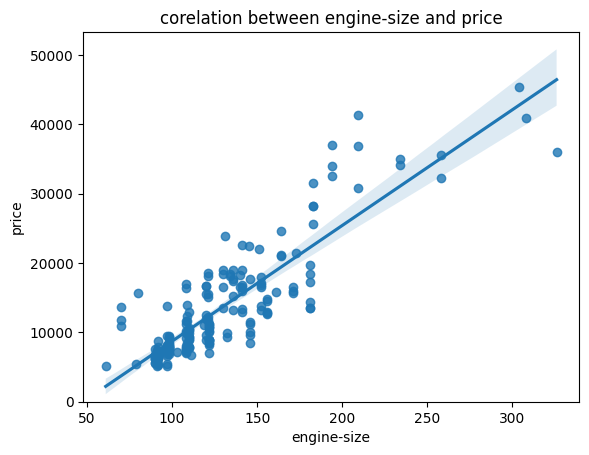

In [42]:
#positive corelation
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)
plt.title('corelation between engine-size and price')
plt.show()

In [43]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


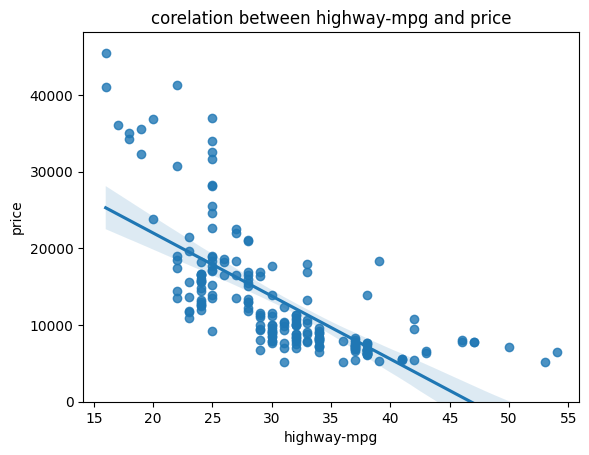

In [44]:
#negative or inverse corelation
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)
plt.title('corelation between highway-mpg and price')
plt.show()

In [45]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


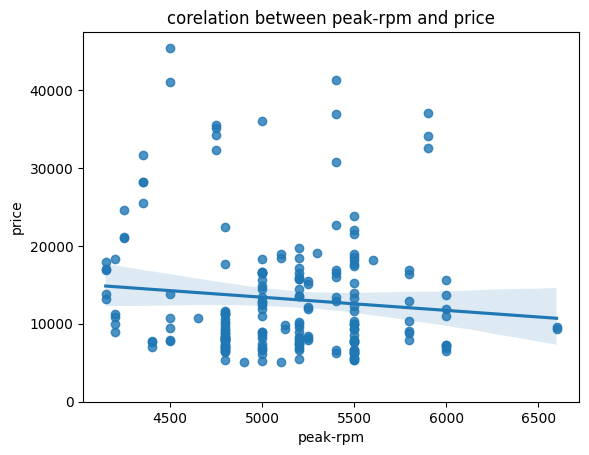

In [46]:
#no corelation as it is a good predictor of price as regline is close to horizontal line
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)
plt.title('corelation between peak-rpm and price')
plt.show()

2.CATEGORICAL VARIABLES


In [47]:
df['body-style'].value_counts()

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

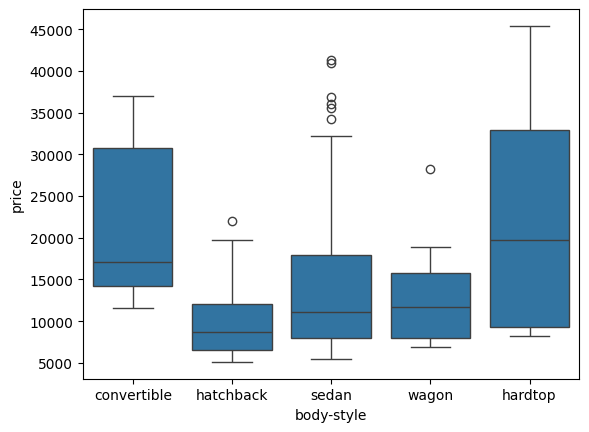

In [48]:
#box plot for categorical variables
sns.boxplot(x='body-style',y='price',data=df)
plt.show()

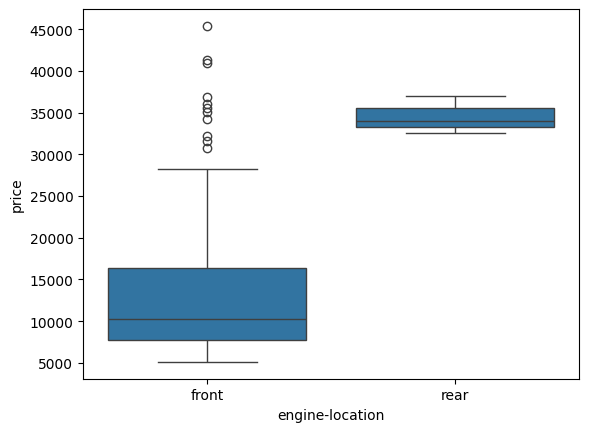

In [49]:
sns.boxplot(x='engine-location',y='price',data=df)
plt.show()

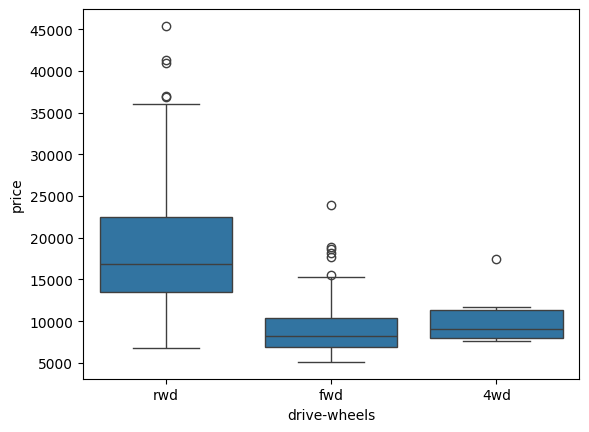

In [50]:
sns.boxplot(x='drive-wheels',y='price',data=df)
plt.show()

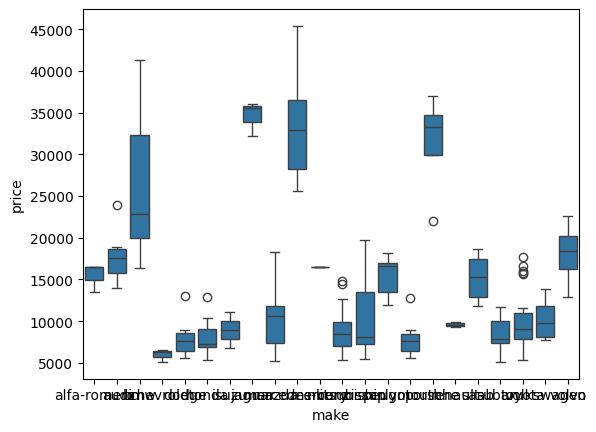

In [51]:
sns.boxplot(x='make',y='price',data=df)
plt.show()

#3.DESCRIPTIVE STATISTICAL ANALYSIS

In [52]:
df.describe() #for contionous variables

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [53]:
df.describe(include=['object']) #for categorical variables

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [54]:
df.describe(include='all') #for all variables

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201,201,201
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,2,2,2,2
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,low,False,True,True,False
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,153,181,181,165,165
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,25.179104,30.686567,13207.129353,9.944145,8.044957,NaN,NaN,NaN,NaN,NaN
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,6.423220,6.815150,7947.066342,2.534599,1.840739,NaN,NaN,NaN,NaN,NaN
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,13.000000,16.000000,5118.000000,4.795918,4.351852,NaN,NaN,NaN,NaN,NaN
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,19.000000,25.000000,7775.000000,7.833333,6.911765,NaN,NaN,NaN,NaN,NaN
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,24.000000,30.000000,10295.000000,9.791667,7.833333,NaN,NaN,NaN,NaN,NaN
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,30.000000,34.000000,16500.000000,12.368421,9.400000,NaN,NaN,NaN,NaN,NaN


In [55]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [56]:
engine_location_counts =df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location':'value_counts'},inplace=True)
engine_location_counts.index.name='engine-location'
engine_location_counts

,count
engine-location,
front,198
rear,3


#4.BASICS OF GROUPING


In [57]:
#the groupby method is used to group data by different categories.
df_grp_1 = df[['drive-wheels','body-style','price']]
df_grp_1 = df_grp_1.groupby(['drive-wheels'],as_index=False).mean(numeric_only=True)
df_grp_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [58]:
df_grp_test1 = df[['drive-wheels','body-style','price']]
grp_test1 = df_grp_test1.groupby(['drive-wheels','body-style'],as_index=False).mean()
grp_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [59]:
grouped_pivot = grp_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [60]:
df_grp_test2 = df[['body-style','price']]
grp_test_bodystyle = df_grp_test2.groupby(['body-style'],as_index=False).mean()
grp_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


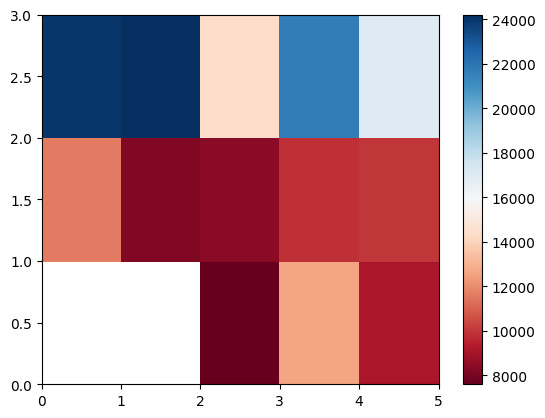

In [61]:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

In [62]:
grouped_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

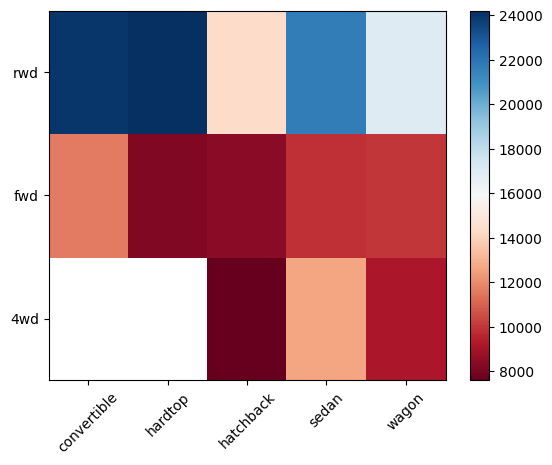

In [63]:
fig,ax = plt.subplots()
im = ax.pcolor(grouped_pivot,cmap='RdBu')
#label names
row_labels = grouped_pivot.columns.levels[1] #access body style from grouped pivot
col_labels=grouped_pivot.index #access drive wheels from grouped pivot
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5,minor=False)
ax.set_xticklabels(row_labels,minor=False)
ax.set_yticklabels(col_labels,minor=False)
plt.xticks(rotation=45)
plt.colorbar(im)
plt.show()

#5.CORELATION AND CAUSATION

In [64]:
#corelation is a measure of the extent of interdependence b/w variables
#causation is a relationship b/w cause and effect b/w 2 variables

In [65]:
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [66]:
#p-value is probability value that the corelation b/w these 2 variables is significant
#we use stats and scipy libraries for this
#<0.001 = strong              generally,we choose 95%(0.05) confident of significant
#<0.05 = moderate
#<0.1 = weak
#>0.1 = no

In [67]:
pearson_coef,p_value = stats.pearsonr(df['wheel-base'],df['price'])
print(pearson_coef,p_value)

0.584641822265508 8.076488270732847e-20


In [68]:
pearson_coef,p_value = stats.pearsonr(df['horsepower'],df['price'])
print(pearson_coef,p_value)

0.8096068016571054 6.273536270650361e-48


In [69]:
pearson_coef,p_value = stats.pearsonr(df['length'],df['price'])
print(pearson_coef,p_value)

0.6906283804483639 8.016477466159293e-30


In [70]:
pearson_coef,p_value = stats.pearsonr(df['curb-weight'],df['price'])
print(pearson_coef,p_value)

0.8344145257702844 2.189577238893924e-53


In [71]:
pearson_coef,p_value = stats.pearsonr(df['engine-size'],df['price'])
print(pearson_coef,p_value)

0.8723351674455184 9.26549162219869e-64


In [72]:
pearson_coef,p_value = stats.pearsonr(df['city-mpg'],df['price'])
print(pearson_coef,p_value)

-0.686571006784468 2.3211320655675065e-29


#6.ANOVA

In [73]:
df_grp_test2 = df[['drive-wheels','price']].groupby(['drive-wheels'])
df_grp_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
140,4wd,7603.0


In [74]:
df_grp_test2.get_group('4wd')['price']

C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\3832065956.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_grp_test2.get_group('4wd')['price']


4      17450.0
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

In [75]:
f_val,p_val = stats.f_oneway(df_grp_test2.get_group('fwd')['price'],df_grp_test2.get_group('4wd')['price'],df_grp_test2.get_group('rwd')['price'])
print(f_val,p_val)

67.95406500780398 3.3945443577149576e-23


C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\2083506724.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val,p_val = stats.f_oneway(df_grp_test2.get_group('fwd')['price'],df_grp_test2.get_group('4wd')['price'],df_grp_test2.get_group('rwd')['price'])


In [76]:
f_val,p_val = stats.f_oneway(df_grp_test2.get_group('fwd')['price'],df_grp_test2.get_group('rwd')['price'])
print(f_val,p_val)
f_val,p_val = stats.f_oneway(df_grp_test2.get_group('rwd')['price'],df_grp_test2.get_group('4wd')['price'])
print(f_val,p_val)
f_val,p_val = stats.f_oneway(df_grp_test2.get_group('4wd')['price'],df_grp_test2.get_group('fwd')['price'])
print(f_val,p_val)

130.55331609591107 2.2355306355677366e-23
8.580681368924756 0.004411492211225367
0.665465750252303 0.4162011669784502


C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\1578203758.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val,p_val = stats.f_oneway(df_grp_test2.get_group('fwd')['price'],df_grp_test2.get_group('rwd')['price'])
C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\1578203758.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val,p_val = stats.f_oneway(df_grp_test2.get_group('rwd')['price'],df_grp_test2.get_group('4wd')['price'])
C:\Users\vivek\AppData\Local\Temp\ipykernel_22480\1578203758.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence th

#MODEL BUILDING

In [77]:
#Objectives 
# develop prediction models

#1.LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION 

LINEAR REGRESSION

--> is a method to understand relation b/w 2 variables

    the predictor/independent variable(X)

    the response/dependent variable(Y)

    the result is a linear function that predicts response(Y) variable as a func of the predictor(X) variable

    Yhat = a+bX
    * a =intercept of the regression line where X=0,is a constant

    * b = slope (m) of the regression line

In [78]:
#create a linear regression object 
lm = LinearRegression()

In [79]:
#create linear func 
X=df[['highway-mpg']]
Y=df['price']

In [80]:
#Fit the linear model using highway-mpg
lm.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
# output prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [82]:
#intercept value
lm.intercept_
#slope value
lm.coef_

array([-821.73337832])

In [83]:
#train the model using 'engine-size' wrt 'price'
lm1=LinearRegression()
lm1.fit(df[['engine-size']],df['price'])
print("value of intercept(a)? \n {}".format(lm1.intercept_)) 
print("value of slope(b)? \n {}".format(lm1.coef_)) 
print("value of final estimated linear model")
print("Yhat = -7963.34+166.86*X") 
print("price = -7963.34+166.86*engine-size") 

value of intercept(a)? 
 -7963.338906281024
value of slope(b)? 
 [166.86001569]
value of final estimated linear model
Yhat = -7963.34+166.86*X
price = -7963.34+166.86*engine-size


#MULTIPLE LINEAR REGRESSION

In [84]:
df_f1 = df[['horsepower','curb-weight','engine-size','highway-mpg','price']]
df_f1.head()

,horsepower,curb-weight,engine-size,highway-mpg,price
0,111,2548,130,27,13495.0
1,111,2548,130,27,16500.0
2,154,2823,152,26,16500.0
3,102,2337,109,30,13950.0
4,115,2824,136,22,17450.0


In [85]:
df_f1.to_csv('df1.csv',index=False)

In [86]:
#in this case the variables are divided as
# horsepower,curb-weight,engine-size,highway-mpg as independent variables
# price as dependent variable


In [87]:
X = df_f1[['horsepower','curb-weight','engine-size','highway-mpg']]
y = df_f1['price']

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 4)
(160,)
(41, 4)
(41,)


In [103]:
#fit the lr with train data
M = lm.fit(X_train,y_train)

In [91]:
y_pred = M.predict(X_test)

In [92]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(mse)
print(r2)
print(mae)

28912782.11640497
0.7636816943519705
3768.722372992149


In [105]:
n=len(y_test)
p=X.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n-p-1))
print(adj_r2)

0.7374241048355228


In [93]:
df_f2 = df[['horsepower','curb-weight','engine-size','highway-mpg','price','length','width','bore','wheel-base','city-mpg']]
df_f2.head()

,horsepower,curb-weight,engine-size,highway-mpg,price,length,width,bore,wheel-base,city-mpg
0,111,2548,130,27,13495.0,0.811148,0.890278,3.47,88.6,21
1,111,2548,130,27,16500.0,0.811148,0.890278,3.47,88.6,21
2,154,2823,152,26,16500.0,0.822681,0.909722,2.68,94.5,19
3,102,2337,109,30,13950.0,0.848630,0.919444,3.19,99.8,24
4,115,2824,136,22,17450.0,0.848630,0.922222,3.19,99.4,18


In [94]:
df_f2.to_csv('df2.csv',index=False)

In [95]:
df_f3 = df[['horsepower','curb-weight','make','engine-size','body-style','drive-wheels','highway-mpg','price','length','width','bore','wheel-base','city-mpg']]
df_f3

,horsepower,curb-weight,make,engine-size,body-style,drive-wheels,highway-mpg,price,length,width,bore,wheel-base,city-mpg
0,111,2548,alfa-romero,130,convertible,rwd,27,13495.0,0.811148,0.890278,3.47,88.6,21
1,111,2548,alfa-romero,130,convertible,rwd,27,16500.0,0.811148,0.890278,3.47,88.6,21
2,154,2823,alfa-romero,152,hatchback,rwd,26,16500.0,0.822681,0.909722,2.68,94.5,19
3,102,2337,audi,109,sedan,fwd,30,13950.0,0.848630,0.919444,3.19,99.8,24
4,115,2824,audi,136,sedan,4wd,22,17450.0,0.848630,0.922222,3.19,99.4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,114,2952,volvo,141,sedan,rwd,28,16845.0,0.907256,0.956944,3.78,109.1,23
201,160,3049,volvo,141,sedan,rwd,25,19045.0,0.907256,0.955556,3.78,109.1,19
202,134,3012,volvo,173,sedan,rwd,23,21485.0,0.907256,0.956944,3.58,109.1,18
203,106,3217,volvo,145,sedan,rwd,27,22470.0,0.907256,0.956944,3.01,109.1,26


In [96]:
df_f3.to_csv("df3.csv")

In [97]:
# 'make' was removed from df earlier; use df_f3 which still contains the original 'make' column
dummy1 = pd.get_dummies(df_f3["make"])
dummy2 = pd.get_dummies(df_f3["body-style"])
dummy3 = pd.get_dummies(df_f3["drive-wheels"])

In [100]:
df_fin = pd.concat([df_f3,dummy1,dummy2,dummy3],axis=1)
#drop actual column "make"
df_fin.drop(["make","body-style","drive-wheels"],axis=1,inplace=True)
df_fin.head()

,horsepower,curb-weight,engine-size,highway-mpg,price,length,width,bore,wheel-base,city-mpg,...,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,111,2548,130,27,13495.0,0.811148,0.890278,3.47,88.6,21,...,False,False,True,False,False,False,False,False,False,True
1,111,2548,130,27,16500.0,0.811148,0.890278,3.47,88.6,21,...,False,False,True,False,False,False,False,False,False,True
2,154,2823,152,26,16500.0,0.822681,0.909722,2.68,94.5,19,...,False,False,False,False,True,False,False,False,False,True
3,102,2337,109,30,13950.0,0.848630,0.919444,3.19,99.8,24,...,False,False,False,False,False,True,False,False,True,False
4,115,2824,136,22,17450.0,0.848630,0.922222,3.19,99.4,18,...,False,False,False,False,False,True,False,True,False,False


In [101]:
df_fin.to_csv("data.csv")